# Лабораторная работа №2. Кластеризация данных

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import euclidean
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('/content/sample_data/DATASET FOR CASE.csv', sep='\t', encoding='cp1252', decimal=',')
df.dropna(inplace=True)
df = df.drop(df[df['Age of client'] < 18].index)
df = df.sample(n=10000, random_state=1) # Выбор случайных 10000 строк, для освобождения оперативной памяти при выполнении кластеризации

In [10]:
df

,Number of calculations of credit limit,Amount of the last loan in the bank,Number of credit in the bank from 2010 year\n,Months from closing of last loan,Number of credits in the bank,Size of payments for last creidts,Credit load %,The balance of the principal debt under the loan for payment as of the valuation date,Have a credit card,Client Revenue,...,Transactions in month,Average monthly withdrawal amount,Average withdrawal amount,Number of visits to the sales point by the client 90 days prior to evaluation,Age of client,Debosits on the valuation date,Number of deposits,Debit card availability,Distance from client's home to bank office,TARGET (take a credit)
23236,7.0,331023.10,2.0,17.0,1.0,3513.41,0.13,173509.31,0,28560.00,...,0.00,0.00,0.00,0.67,57.0,0.0,0.0,0.0,975.90,0
35505,4.0,112666.67,6.0,31.0,1.0,5734.00,0.27,48593.78,0,22032.00,...,0.00,0.00,0.00,2.67,55.0,0.0,0.0,0.0,1645.73,0
23010,2.0,160000.00,1.0,25.0,0.0,0.00,0.00,0.00,0,17578.68,...,0.33,0.00,0.00,1.67,30.0,0.0,0.0,1.0,0.00,0
21092,0.0,150100.00,1.0,66.0,1.0,5039.00,0.00,124980.11,0,0.00,...,8.67,1916.67,1150.00,1.67,39.0,0.0,0.0,1.0,4717.10,0
43054,1.0,30614.66,2.0,19.0,2.0,2375.00,0.37,52974.32,0,6630.00,...,6.00,8016.67,2672.22,5.00,40.0,1.0,1.0,1.0,2291.35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16523,2.0,380638.06,1.0,32.0,1.0,7587.00,0.47,224026.39,0,16307.76,...,0.00,0.00,0.00,0.67,37.0,0.0,0.0,0.0,4559.10,0
30324,3.0,65322.22,6.0,18.0,1.0,3325.00,0.09,36612.10,0,38760.00,...,0.67,0.00,0.00,2.00,31.0,0.0,0.0,1.0,1474.95,0
21757,6.0,693417.72,4.0,20.0,1.0,13773.00,0.30,558779.66,0,46920.00,...,54.67,38366.67,2877.50,2.67,26.0,0.0,0.0,1.0,854.39,0
39489,1.0,42034.94,3.0,64.0,0.0,0.00,0.00,0.00,0,30600.00,...,0.00,0.00,0.00,0.67,37.0,0.0,0.0,0.0,2399.18,1


Считайте банковские данные из файла DATASET FOR CASE.csv в память в виде объекта Pandas.DataFrame (разделитель между колонками - табуляция, кодировка - ansi, для разделения целой и дробной частей чисел используется запятая). Выведите информацию о датасете, поймите и опишите его структуру. TARGET (take a credit) - целевая бинарная переменная, информирующая о выдаче / невыдаче кредита.

Представим, что значение переменной TARGET (take a credit) неизвестно. С помощью kmeans и метода локтя определите количество кластеров для датасета.

In [12]:
# Удаление целевой переменной для кластеризации
df_dr = df.drop(columns=['TARGET (take a credit)'])

df_dr

,Number of calculations of credit limit,Amount of the last loan in the bank,Number of credit in the bank from 2010 year\n,Months from closing of last loan,Number of credits in the bank,Size of payments for last creidts,Credit load %,The balance of the principal debt under the loan for payment as of the valuation date,Have a credit card,Client Revenue,...,Monthly transaction amount for the card,Transactions in month,Average monthly withdrawal amount,Average withdrawal amount,Number of visits to the sales point by the client 90 days prior to evaluation,Age of client,Debosits on the valuation date,Number of deposits,Debit card availability,Distance from client's home to bank office
23236,7.0,331023.10,2.0,17.0,1.0,3513.41,0.13,173509.31,0,28560.00,...,0.00,0.00,0.00,0.00,0.67,57.0,0.0,0.0,0.0,975.90
35505,4.0,112666.67,6.0,31.0,1.0,5734.00,0.27,48593.78,0,22032.00,...,0.00,0.00,0.00,0.00,2.67,55.0,0.0,0.0,0.0,1645.73
23010,2.0,160000.00,1.0,25.0,0.0,0.00,0.00,0.00,0,17578.68,...,1686.10,0.33,0.00,0.00,1.67,30.0,0.0,0.0,1.0,0.00
21092,0.0,150100.00,1.0,66.0,1.0,5039.00,0.00,124980.11,0,0.00,...,3734.72,8.67,1916.67,1150.00,1.67,39.0,0.0,0.0,1.0,4717.10
43054,1.0,30614.66,2.0,19.0,2.0,2375.00,0.37,52974.32,0,6630.00,...,8592.33,6.00,8016.67,2672.22,5.00,40.0,1.0,1.0,1.0,2291.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16523,2.0,380638.06,1.0,32.0,1.0,7587.00,0.47,224026.39,0,16307.76,...,0.00,0.00,0.00,0.00,0.67,37.0,0.0,0.0,0.0,4559.10
30324,3.0,65322.22,6.0,18.0,1.0,3325.00,0.09,36612.10,0,38760.00,...,66.67,0.67,0.00,0.00,2.00,31.0,0.0,0.0,1.0,1474.95
21757,6.0,693417.72,4.0,20.0,1.0,13773.00,0.30,558779.66,0,46920.00,...,58172.48,54.67,38366.67,2877.50,2.67,26.0,0.0,0.0,1.0,854.39
39489,1.0,42034.94,3.0,64.0,0.0,0.00,0.00,0.00,0,30600.00,...,0.00,0.00,0.00,0.00,0.67,37.0,0.0,0.0,0.0,2399.18


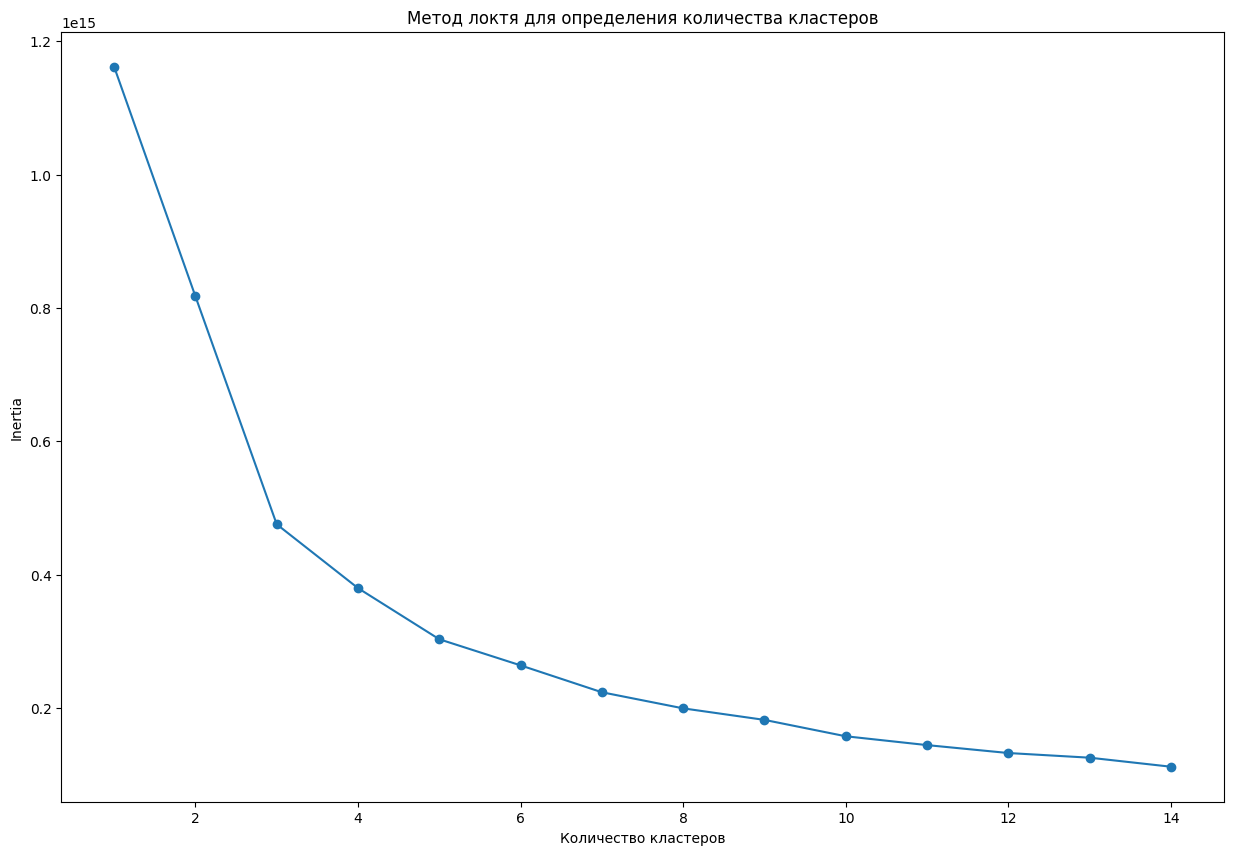

In [17]:
# Метод локтя
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_dr)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.figure(figsize=(15, 10))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Метод локтя для определения количества кластеров')
plt.show()


In [20]:
df1 = df_dr.copy()

Используя kmeans и выше определенное число кластеров k, получите метки классов, выведите их и добавьте их в исходный датасет, записав его под новым именем.

In [21]:
kmeans = KMeans(n_clusters=3, n_init=20, init='k-means++', random_state=11)
kmeans.fit_predict(df1)

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [22]:
df1['Cluster'] = kmeans.labels_

In [23]:
df1['Cluster'].value_counts()

,count
Cluster,
0,7936
1,2035
2,29


In [24]:
df1.groupby('Cluster').mean()

,Number of calculations of credit limit,Amount of the last loan in the bank,Number of credit in the bank from 2010 year\n,Months from closing of last loan,Number of credits in the bank,Size of payments for last creidts,Credit load %,The balance of the principal debt under the loan for payment as of the valuation date,Have a credit card,Client Revenue,...,Monthly transaction amount for the card,Transactions in month,Average monthly withdrawal amount,Average withdrawal amount,Number of visits to the sales point by the client 90 days prior to evaluation,Age of client,Debosits on the valuation date,Number of deposits,Debit card availability,Distance from client's home to bank office
Cluster,,,,,,,,,,,,,,,,,,,,,
0,4.194304,1.512274e+05,2.212198,46.771799,0.630418,3102.933054,0.089432,66340.729176,0.098160,24208.907623,...,12634.939609,8.946673,8763.319743,2409.311003,2.399685,43.961820,0.134073,0.162046,0.635963,8560.714110
1,3.602457,5.451173e+05,2.617199,36.693857,0.873219,9470.224742,0.188585,316421.136786,0.101229,44562.919843,...,26232.845425,11.152069,17224.729848,4074.261115,3.108442,43.417690,0.185749,0.225553,0.676658,9888.939656
2,5.551724,3.618677e+06,1.413793,23.379310,0.034483,399.241379,0.002069,11740.161724,0.827586,102901.468966,...,163046.854138,43.448276,76474.137586,11147.831379,3.367241,41.275862,0.241379,0.241379,1.000000,6879.475517


Примените для решения той же задачи агломеративную, аффинную и спектральную кластеризации: инструменты AgglomerativeClustering, AffinityPropagation, SpectralClustering из sklearn.cluster, и, используя метрики качества кластеризации, прокомментируйте достигнутые результаты.

Применение других алгоритмов кластеризации

2. Агломеративная кластеризация

Инициализируем агломеративную кластеризацию с 3 кластерами

In [26]:
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')

agg_cluster.fit_predict(df_dr)

array([0, 1, 1, ..., 0, 1, 1])

Создаем копию исходного DataFrame df_dr для добавления меток кластеров и добавляем метки кластеров в новый столбец 'Cluster'

In [27]:
df2 = df_dr.copy()

df2['Cluster'] = agg_cluster.labels_

Проверяем, сколько объектов попало в каждый кластер

value_counts выводит количество объектов в каждом кластере

In [28]:
df2.value_counts('Cluster')

,count
Cluster,
1,7966
0,2005
2,29


Группируем данные по меткам кластеров и находим средние значения по каждому кластеру

Это позволяет оценить, как отличаются кластеры по различным признакам

In [29]:
df2.groupby('Cluster').mean()

,Number of calculations of credit limit,Amount of the last loan in the bank,Number of credit in the bank from 2010 year\n,Months from closing of last loan,Number of credits in the bank,Size of payments for last creidts,Credit load %,The balance of the principal debt under the loan for payment as of the valuation date,Have a credit card,Client Revenue,...,Monthly transaction amount for the card,Transactions in month,Average monthly withdrawal amount,Average withdrawal amount,Number of visits to the sales point by the client 90 days prior to evaluation,Age of client,Debosits on the valuation date,Number of deposits,Debit card availability,Distance from client's home to bank office
Cluster,,,,,,,,,,,,,,,,,,,,,
0,3.397506,5.152802e+05,2.658853,36.851372,0.959102,10117.271072,0.211292,336662.580200,0.086284,41164.614643,...,20220.449940,10.507471,13347.777596,3942.360454,3.065885,43.525187,0.179052,0.214963,0.679302,8405.508140
1,4.243661,1.602207e+05,2.203239,46.694200,0.609716,2964.054177,0.084090,62187.869295,0.101933,25140.896362,...,14199.437491,9.117221,9770.993804,2448.779912,2.413066,43.932714,0.135953,0.164951,0.635451,8939.088069
2,5.551724,3.618677e+06,1.413793,23.379310,0.034483,399.241379,0.002069,11740.161724,0.827586,102901.468966,...,163046.854138,43.448276,76474.137586,11147.831379,3.367241,41.275862,0.241379,0.241379,1.000000,6879.475517


3. Аффинная кластеризация (AffinityPropagation)

Инициализируем модель аффинной кластеризации без указания количества кластеров (AffinityPropagation сама решит, сколько кластеров)

In [30]:
aff_cluster = AffinityPropagation()

aff_cluster.fit_predict(df_dr)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


array([ 17,  33, 149, ..., 127, 180, 167])

Создаем копию исходного DataFrame df_dr для добавления меток кластеров и добавляем метки кластеров в новый столбец 'Cluster'

In [31]:
df3 = df_dr.copy()

df3['Cluster'] = aff_cluster.labels_

Проверяем, сколько объектов в каждом кластере

In [32]:
df3.value_counts('Cluster')

,count
Cluster,
149,292
111,283
221,277
150,255
116,246
...,...
100,1
102,1
105,1


4. Спектральная кластеризация (SpectralClustering)

In [33]:
sp_cluster = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')

sp_labels = sp_cluster.fit_predict(df_dr)

Инициализируем модель спектральной кластеризации с 3 кластерами и использованием ближайших соседей для вычисления сходства

Создаем копию исходного DataFrame df_dr для добавления меток кластеров

In [34]:
df4 = df_dr.copy()

df4['Cluster'] = sp_cluster.labels_

Проверяем, сколько объектов попало в каждый кластер

In [35]:
df4.value_counts('Cluster')

,count
Cluster,
1,5736
0,4182
2,82


Группируем данные по меткам кластеров и находим средние значения по каждому кластеру

In [36]:
df4.groupby('Cluster').mean()

,Number of calculations of credit limit,Amount of the last loan in the bank,Number of credit in the bank from 2010 year\n,Months from closing of last loan,Number of credits in the bank,Size of payments for last creidts,Credit load %,The balance of the principal debt under the loan for payment as of the valuation date,Have a credit card,Client Revenue,...,Monthly transaction amount for the card,Transactions in month,Average monthly withdrawal amount,Average withdrawal amount,Number of visits to the sales point by the client 90 days prior to evaluation,Age of client,Debosits on the valuation date,Number of deposits,Debit card availability,Distance from client's home to bank office
Cluster,,,,,,,,,,,,,,,,,,,,,
0,3.673840,3.839208e+05,2.512434,39.672884,0.874223,7583.563374,0.169328,229824.056064,0.087996,37236.653659,...,21543.113563,9.920555,14959.802518,3693.392573,2.895036,43.780488,0.170253,0.208513,0.662123,10440.816954
1,4.347803,1.087583e+05,2.143654,48.619421,0.543759,2115.075286,0.067038,36263.447268,0.101116,21522.671287,...,10713.251198,8.900772,7193.534487,2041.974942,2.284320,43.930962,0.126569,0.151151,0.629010,7711.979317
2,5.792683,2.256125e+06,1.463415,21.195122,0.073171,754.002439,0.010976,19587.424390,0.743902,80656.674146,...,83397.197073,29.422805,36485.033659,7026.397439,3.138171,40.914634,0.134146,0.158537,0.926829,4413.589146


Оценка качества кластеризации с использованием метрик

In [37]:
from sklearn import metrics

X, y = df_dr, df['TARGET (take a credit)']

algorithms = []
algorithms.append(KMeans(n_clusters=3, n_init=20, init='k-means++', random_state=11))
algorithms.append(AffinityPropagation())
algorithms.append(SpectralClustering(n_clusters=3, random_state=12, affinity='nearest_neighbors'))
algorithms.append(AgglomerativeClustering(n_clusters=4, linkage='ward'))


data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['K-means', 'Affinity',
                              'Spectral', 'Agglomerative'])

results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,-0.013460,0.000624,0.001580,0.000645,0.000916,0.581441
Affinity,0.000252,0.002912,0.081475,0.003763,0.007194,0.194814
Spectral,-0.001749,0.000248,0.001023,0.000303,0.000467,0.445773
Agglomerative,-0.012231,0.000725,0.002085,0.000771,0.001126,0.539009




*   K-means демонстрирует лучшее качество кластеризации, особенно по метрике Silhouette Score, что свидетельствует о хорошей разделимости кластеров. Однако, несмотря на это, его метрики качества кластеризации в контексте целевой переменной остаются слабыми, что подтверждается отрицательными значениями ARI и AMI.

*   Affinity Propagation демонстрирует более высокие значения в метриках гомогенности, полноты и V-measure, но эти значения по-прежнему очень низкие. Сила этого алгоритма заключается в том, что он не требует предварительного указания количества кластеров, однако, его качество кластеризации тоже оставляет желать лучшего.

*   Spectral Clustering и Agglomerative Clustering показывают схожие результаты, их показатели качества кластеризации тоже достаточно низкие. При этом, их силуэтный показатель ниже, чем у K-means, что указывает на более слабую разделимость кластеров.